In [194]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from glob import glob

In [45]:
glob("r*.zip")

['rivers_africa_37333.zip', 'routes_ecuador.zip', 'rivers_ecuador.zip']

In [270]:
rivers_ec = gpd.read_file("rivers_ecuador.zip")
rivers_ec.shape

(28295, 5)

In [271]:
rivers_ec.groupby("ID").size()

ID
1    28295
dtype: int64

In [274]:
limit_b = rivers_ec['LENGTH_KIL'].quantile(.95)
# limit_a = rivers_ec['LENGTH_KIL'].quantile(.05)
limit_a = 0
limit_a, limit_b

(0, 11.139499999999996)

In [276]:
rivers_ec2 = rivers_ec[(rivers_ec['LENGTH_KIL']>=limit_a)&(rivers_ec['LENGTH_KIL']<=limit_b)].copy()
rivers_ec2.shape

(26880, 5)

In [278]:
rivers_ec2['LENGTH_KIL'].describe()

count    26880.000000
mean         3.399476
std          2.557743
min          0.001000
25%          1.378000
50%          2.864000
75%          4.882000
max         11.138000
Name: LENGTH_KIL, dtype: float64

In [280]:
rivers_ec2['width'] = 14 - rivers_ec2['LENGTH_KIL']
rivers_ec2['width'] = rivers_ec2['width'] / 10

rivers_ec2['width'].describe()

count    26880.000000
mean         1.060052
std          0.255774
min          0.286200
25%          0.911800
50%          1.113600
75%          1.262200
max          1.399900
Name: width, dtype: float64

In [326]:
# Define bins based on natural breaks or an organic division
bins = [rivers_ec2['width'].min(), 0.5, 0.75, 0.9, 1.0, 1.1, 1.2, 1.25, rivers_ec2['width'].max()]

# Assign each row to a section based on the bins
# rivers_ec2['SECTIONS'] = pd.cut(rivers_ec2['width'], bins=bins, labels=range(1, len(bins)))
rivers_ec2['SECTIONS'] = pd.cut(rivers_ec2['width'], bins=bins, labels=range(len(bins)-1, 0, -1))
rivers_ec2

,ID,CATEGORíA,NOMBRE,LENGTH_KIL,geometry,width,SECTIONS
0,1,1,None,0.097,"LINESTRING (778336.297 9850618.384, 778345.597...",1.3903,1
1,1,1,None,4.635,"LINESTRING (928379.6 9743528.991, 928489.354 9...",0.9365,5
2,1,1,None,5.536,"LINESTRING (926975.629 9745381.784, 926997.557...",0.8464,6
3,1,1,None,2.071,"LINESTRING (1024833.114 9770415.503, 1025047.0...",1.1929,3
4,1,1,R. SAN PABLO,2.144,"LINESTRING (673116.904 9895125.647, 673145.221...",1.1856,3
...,...,...,...,...,...,...,...
28290,1,1,None,1.789,"LINESTRING (1071189.879 9788273.292, 1071089.7...",1.2211,2
28291,1,1,None,1.153,"LINESTRING (1071189.879 9788273.292, 1071897.2...",1.2847,1
28292,1,1,R. CONAMBO,4.011,"LINESTRING (1051938.921 9764577.798, 1051890.8...",0.9989,5
28293,1,1,R. CONAMBO,5.265,"LINESTRING (1047625.123 9763627.769, 1047881.8...",0.8735,6


In [332]:
rivers_ec2.groupby("SECTIONS").size()

/tmp/ipykernel_185/1152326844.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rivers_ec2.groupby("SECTIONS").size()


SECTIONS
8    1068
7    2543
6    2796
5    2828
4    3654
3    4364
2    2362
1    7264
dtype: int64

In [334]:
rivers_ec2.groupby("SECTIONS")['width'].mean()

/tmp/ipykernel_185/841826487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rivers_ec2.groupby("SECTIONS")['width'].mean()


SECTIONS
8    0.403073
7    0.641575
6    0.830666
5    0.952919
4    1.052190
3    1.151197
2    1.224803
1    1.328883
Name: width, dtype: float64

(458110.23148512735, 1180781.6233213905, 9414608.431222955, 10193328.836938974)

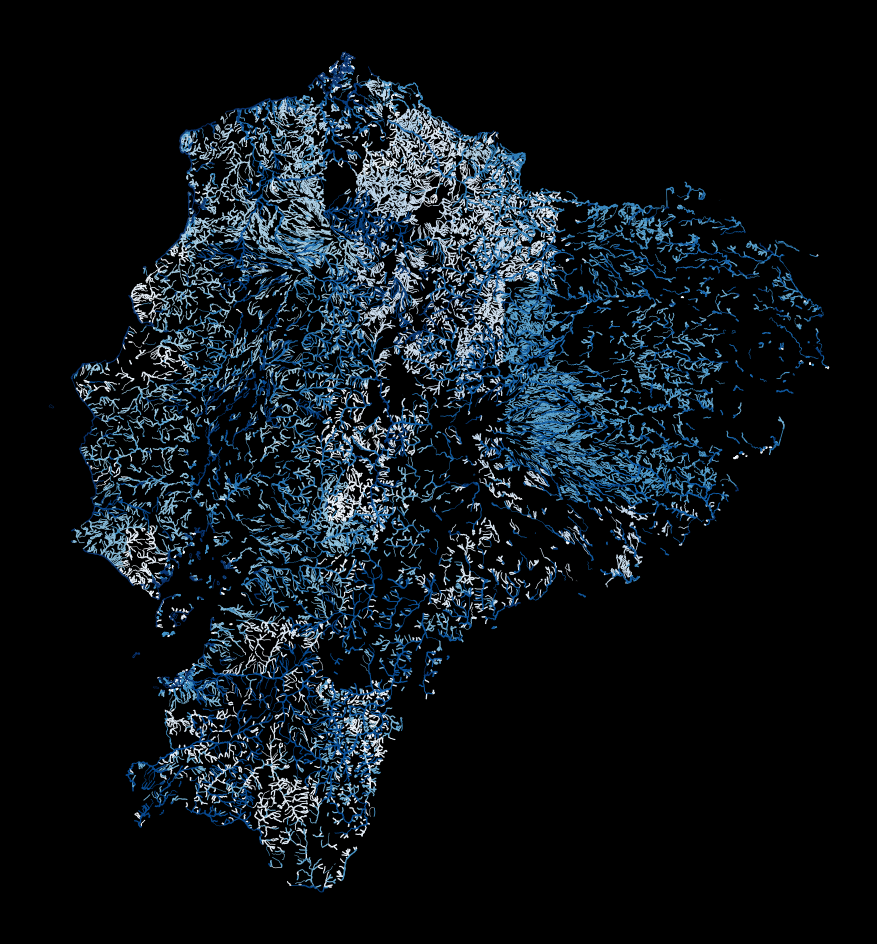

In [352]:
f, ax = plt.subplots(1, 1, figsize=(15, 12))

rivers_ec2.geometry.plot(ax=ax, linewidth=rivers_ec2['width'], cmap='Blues')
f.patch.set_facecolor('k')
ax.set_facecolor('k')
ax.axis('off')

(458110.23148512735, 1180781.6233213905, 9414608.431222955, 10193328.836938974)

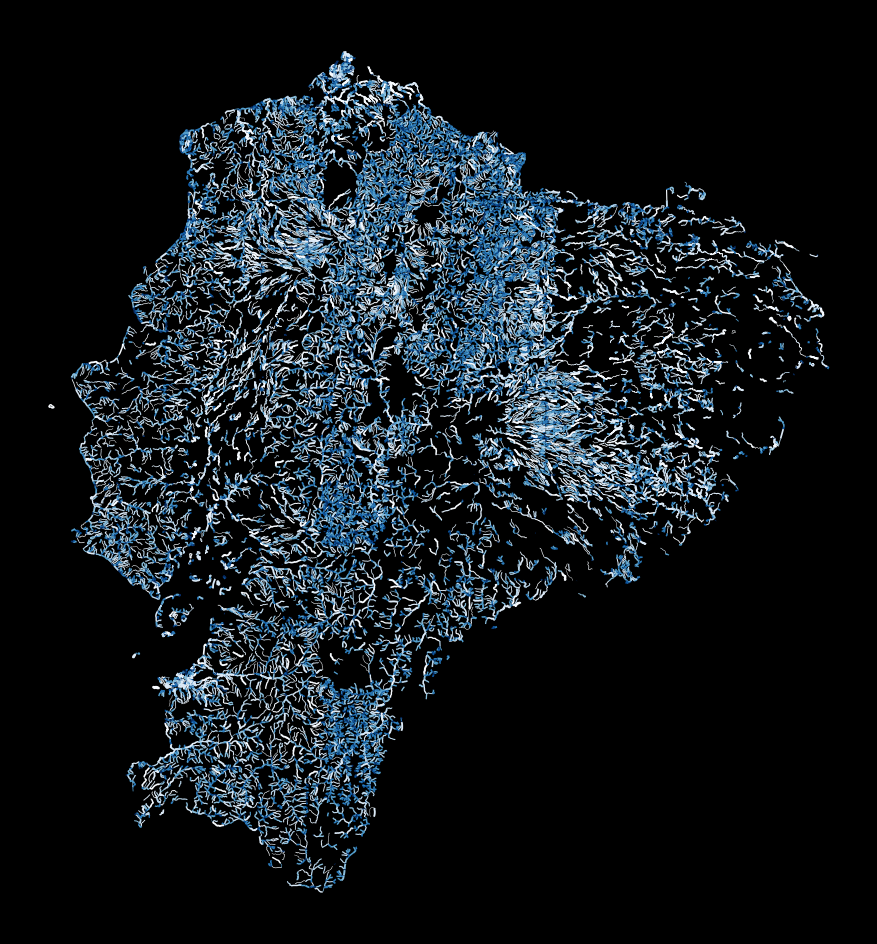

In [324]:
f, ax = plt.subplots(1, 1, figsize=(15, 12))

rivers_ec2.plot(column='SECTIONS', ax=ax, linewidth=rivers_ec2['width'], cmap='Blues')

f.patch.set_facecolor('k')
ax.set_facecolor('k')
ax.axis('off')

(458110.23148512735, 1180781.6233213905, 9414608.431222955, 10193328.836938974)

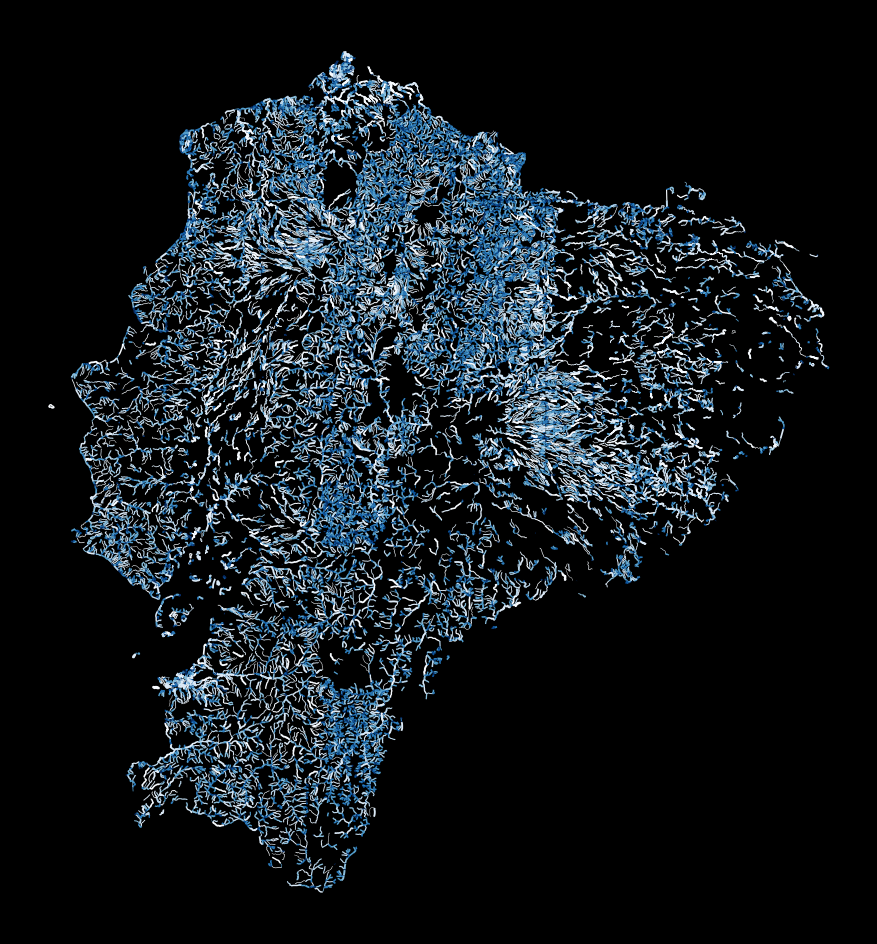

In [336]:
f, ax = plt.subplots(1, 1, figsize=(15, 12))

rivers_ec2.plot(column='SECTIONS', ax=ax, linewidth=rivers_ec2['width'], cmap='Blues')

f.patch.set_facecolor('k')
ax.set_facecolor('k')
ax.axis('off')